In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('disease.csv')

In [3]:
test_data  = pd.read_csv('unseen_data.csv')

In [4]:
sample = pd.read_csv('sample_solution.csv')

In [5]:
train_data.shape

(257, 14)

In [6]:
test_data.shape

(46, 13)

In [7]:
sample.head()

,Id,disease
0,0,1
1,1,1
2,2,0
3,3,0
4,4,1


In [8]:
sample.shape

(46, 2)

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       257 non-null    int64  
 1   sex       257 non-null    int64  
 2   cp        257 non-null    int64  
 3   trestbps  257 non-null    int64  
 4   chol      257 non-null    int64  
 5   fbs       257 non-null    int64  
 6   restecg   257 non-null    int64  
 7   thalach   257 non-null    int64  
 8   exang     257 non-null    int64  
 9   oldpeak   257 non-null    float64
 10  slope     257 non-null    int64  
 11  ca        257 non-null    int64  
 12  thal      257 non-null    int64  
 13  disease   257 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 28.2 KB


In [12]:
train_data.isnull().sum().any() ########### no null values and all are numeric columns

False

<AxesSubplot:xlabel='disease', ylabel='Count'>

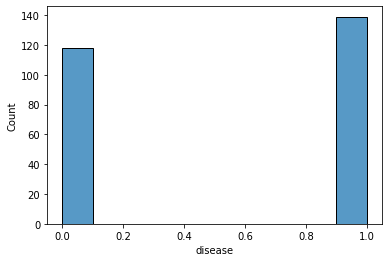

In [18]:
sns.histplot(train_data['disease'])

In [19]:
train_data['disease'].value_counts() ############## balanced dataset

1    139
0    118
Name: disease, dtype: int64

In [20]:
numeric_cols = [f for f in train_data.columns if train_data[f].dtypes != 'O']

In [21]:
len(numeric_cols)

14

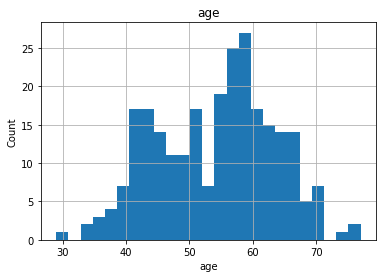

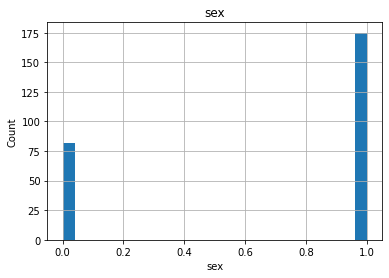

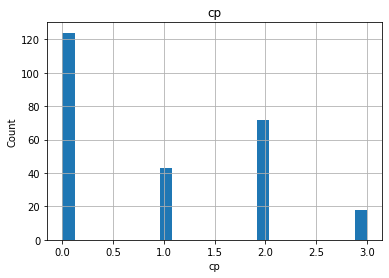

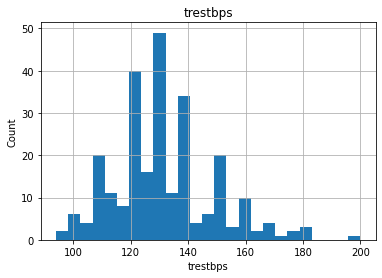

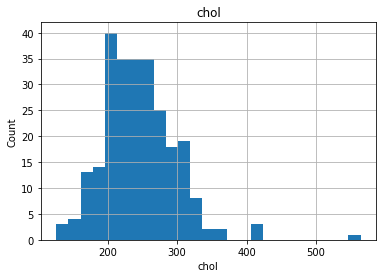

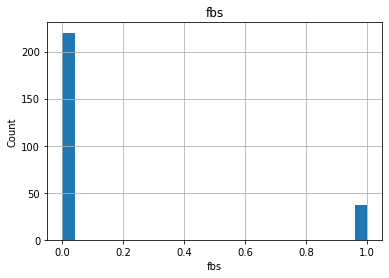

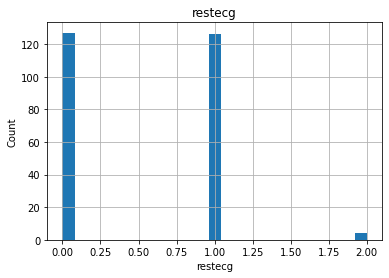

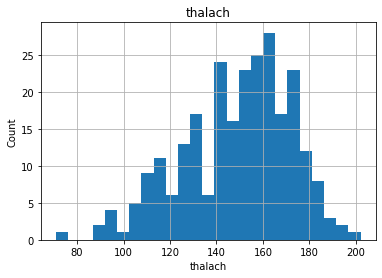

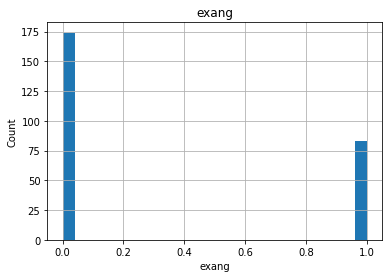

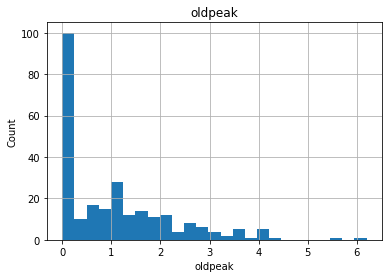

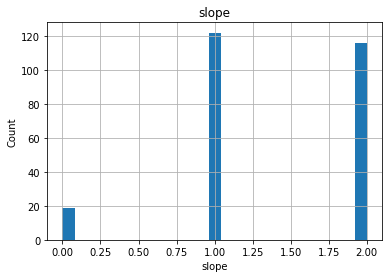

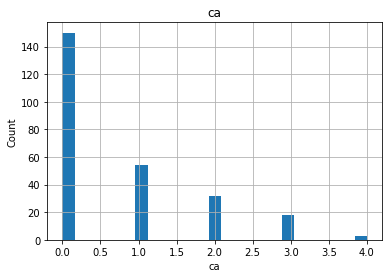

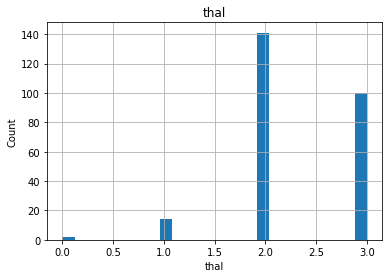

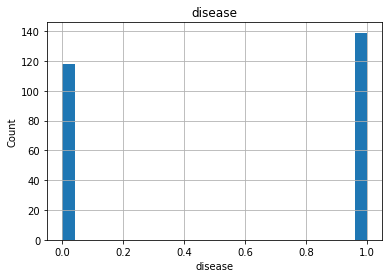

In [22]:
############### Numeric Features ################################
for feature in numeric_cols:
    data=train_data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [24]:
discrete_cols = [f for f in numeric_cols if len(train_data[f].unique())< 10]

In [25]:
discrete_cols

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'disease']

In [27]:
continuos_cols = [f for f in numeric_cols if f not in discrete_cols]

In [28]:
continuos_cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

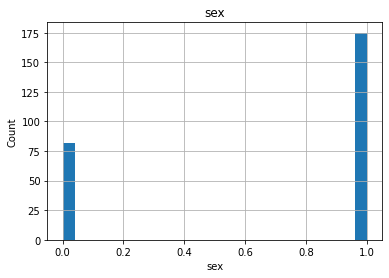

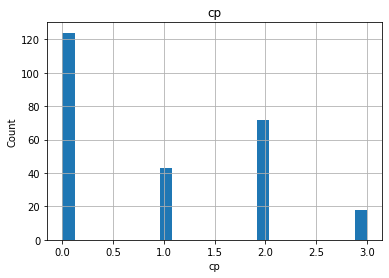

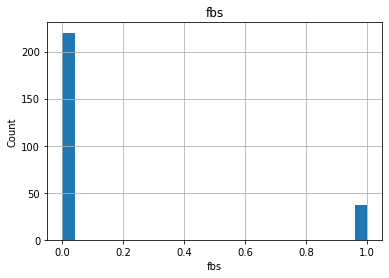

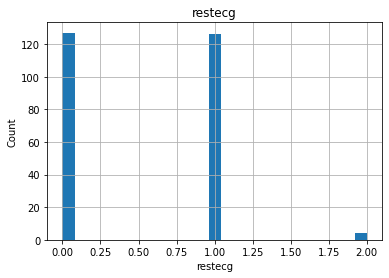

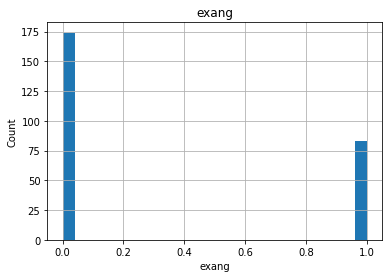

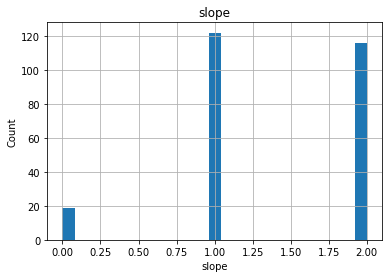

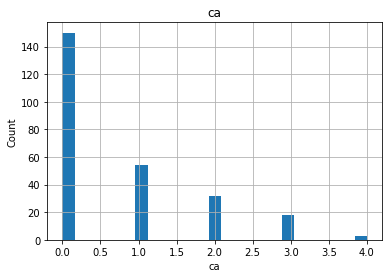

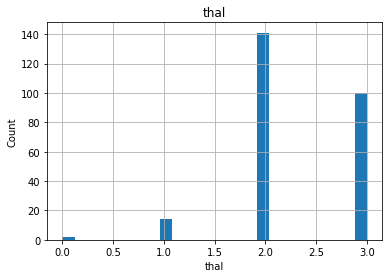

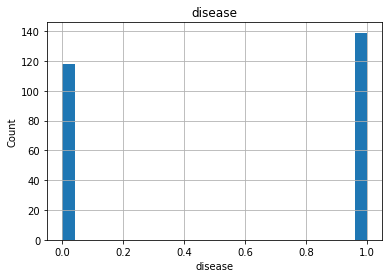

In [29]:
############### Discete Features ################################
for feature in discrete_cols:
    data=train_data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

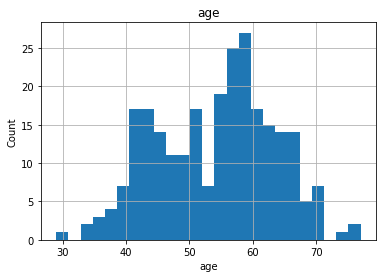

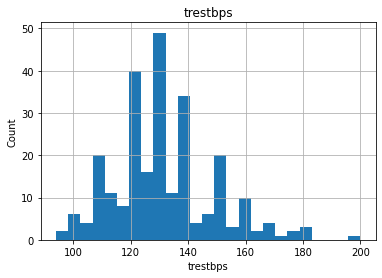

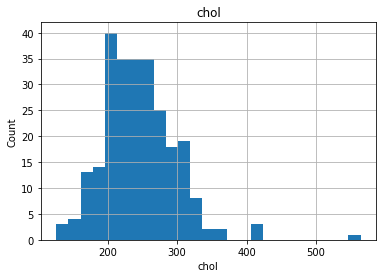

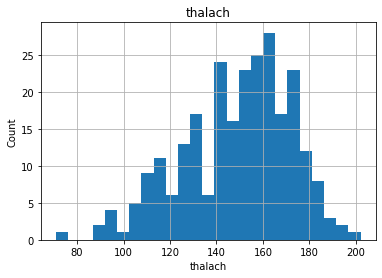

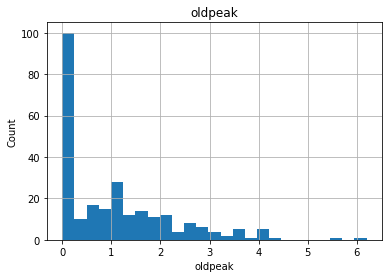

In [30]:
############### Continous Nuerical Features ################################
for feature in continuos_cols:
    data=train_data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [32]:
############## All are normally distributed ##############

In [33]:
train_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
1,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
2,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
3,48,1,1,130,245,0,0,180,0,0.2,1,0,2,1
4,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1


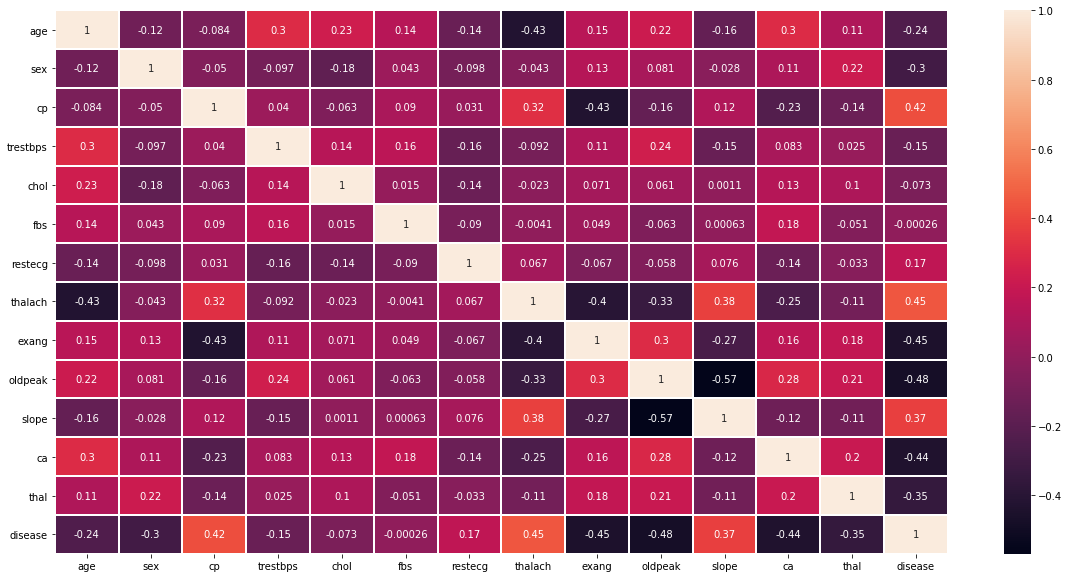

In [34]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(train_data.corr(),annot=True,linecolor='white',linewidths=2, ax=ax)
plt.show()

In [35]:
########## None of the columns are highly co related.

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='disease'>

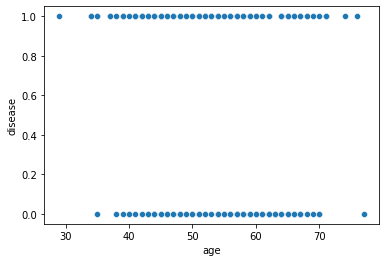

In [38]:
sns.scatterplot(train_data['age'],train_data['disease'])

In [50]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

correlation(train_data,0.8)

set()

In [48]:
X = train_data.drop(['disease'],axis=1)
y = train_data['disease']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

from sklearn.preprocessing import StandardScaler
sm = StandardScaler()
X_train_scaled = sm.fit_transform(X_train)
X_test_scaled = sm.transform(X_test)

from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled,y_train)
y_pred = lr_clf.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred))

from sklearn.metrics import accuracy_score
print("accuracy is: " ,accuracy_score(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.89      0.67      0.76        36
           1       0.76      0.93      0.84        42

    accuracy                           0.81        78
   macro avg       0.83      0.80      0.80        78
weighted avg       0.82      0.81      0.80        78

[[24 12]
 [ 3 39]]
accuracy is:  0.8076923076923077


In [46]:
############# Decision Tree Classifier ###################
X = train_data.drop(['disease'],axis=1)
y = train_data['disease']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

from sklearn.preprocessing import StandardScaler
sm = StandardScaler()
X_train_scaled = sm.fit_transform(X_train)
X_test_scaled = sm.transform(X_test)

from sklearn.tree import DecisionTreeClassifier
ex_decision = DecisionTreeClassifier()
ex_decision.fit(X_train_scaled,y_train)
y_pred_dt = ex_decision.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dt))

from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred_dt))

from sklearn.metrics import accuracy_score
print("accuracy is: " ,accuracy_score(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.79      0.63      0.70        35
           1       0.74      0.86      0.80        43

    accuracy                           0.76        78
   macro avg       0.76      0.74      0.75        78
weighted avg       0.76      0.76      0.75        78

[[22 13]
 [ 6 37]]
accuracy is:  0.7564102564102564


<AxesSubplot:xlabel='disease', ylabel='Count'>

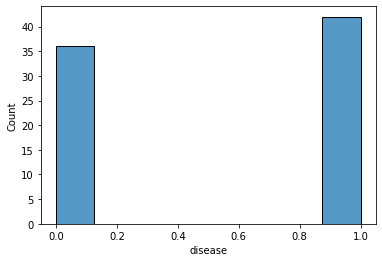

In [51]:
sns.histplot(y_test)

<AxesSubplot:ylabel='Count'>

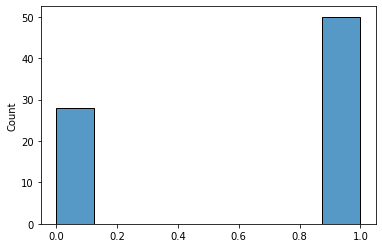

In [52]:
sns.histplot(y_pred_dt)

In [59]:
############# XGB  Classifier ###################
X = train_data.drop(['disease'],axis=1)
y = train_data['disease']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

from sklearn.preprocessing import StandardScaler
sm = StandardScaler()
X_train_scaled = sm.fit_transform(X_train)
X_test_scaled = sm.transform(X_test)

import xgboost as xgb
xg_decision = xgb.XGBClassifier()
xg_decision.fit(X_train_scaled,y_train)
y_pred_xg = xg_decision.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_xg))

from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred_xg))

from sklearn.metrics import accuracy_score
print("accuracy is: " ,accuracy_score(y_test,y_pred_xg))

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:55:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.87      0.77      0.81        43
           1       0.75      0.86      0.80        35

    accuracy                           0.81        78
   macro avg       0.81      0.81      0.81        78
weighted avg       0.82      0.81      0.81        78

[[33 10]
 [ 5 30]]
accuracy is:  0.8076923076923077


c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


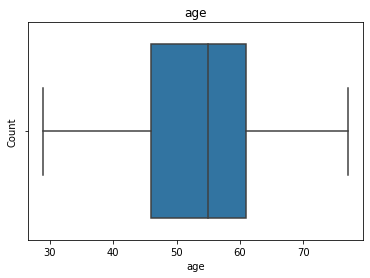

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


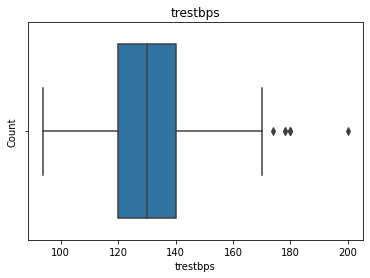

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


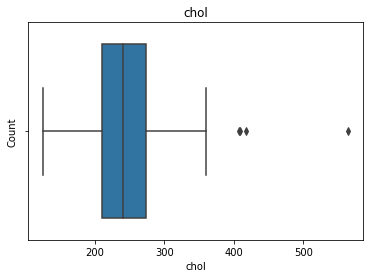

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


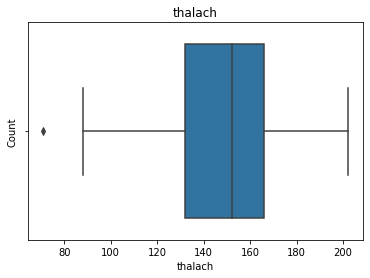

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


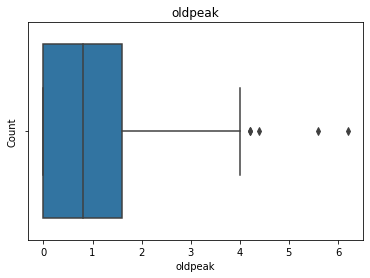

In [62]:
############# checking for outliers in continous features ##############
############### Continous Nuerical Features ################################
for feature in continuos_cols:
    data=train_data.copy()
    sns.boxplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [63]:
############ NOTE : except age -- all the features are having outlers as seen in box plot

In [66]:
######## MIN MAX SCALER $$$$$$$$$$$$$$$
X_new = train_data.drop(['disease'],axis=1)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_new)
scaler.transform(X_new)





array([[0.58333333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        0.33333333],
       [0.58333333, 0.        , 0.        , ..., 1.        , 0.        ,
        0.66666667],
       [0.35416667, 1.        , 0.66666667, ..., 0.5       , 0.        ,
        0.66666667],
       ...,
       [0.3125    , 0.        , 0.66666667, ..., 0.5       , 0.        ,
        0.66666667],
       [0.60416667, 1.        , 0.66666667, ..., 1.        , 0.        ,
        0.66666667],
       [0.25      , 1.        , 0.66666667, ..., 0.5       , 0.        ,
        0.66666667]])

In [65]:
train_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
1,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
2,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
3,48,1,1,130,245,0,0,180,0,0.2,1,0,2,1
4,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1


In [67]:
data1 = pd.concat([ train_data['disease'], pd.DataFrame(scaler.transform(X_new)  ,columns = X_new.columns) ],axis=1 )

In [68]:
data1

,disease,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,0.583333,1.0,0.000000,0.528302,0.342466,0.0,0.0,0.312977,1.0,0.096774,0.5,0.25,0.333333
1,1,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
2,0,0.354167,1.0,0.666667,0.528302,0.239726,0.0,0.5,0.580153,0.0,0.580645,0.5,0.00,0.666667
3,1,0.395833,1.0,0.333333,0.339623,0.271689,0.0,0.0,0.832061,0.0,0.032258,0.5,0.00,0.666667
4,1,0.500000,0.0,0.666667,0.320755,0.205479,0.0,0.0,0.335878,0.0,0.000000,1.0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,0,0.708333,1.0,0.000000,0.433962,0.139269,0.0,0.0,0.557252,1.0,0.645161,1.0,0.50,1.000000
253,0,0.187500,1.0,1.000000,0.245283,0.239726,0.0,0.5,0.847328,1.0,0.612903,0.5,0.00,1.000000
254,1,0.312500,0.0,0.666667,0.132075,0.034247,0.0,0.5,0.793893,0.0,0.096774,0.5,0.00,0.666667
255,1,0.604167,1.0,0.666667,0.433962,0.194064,1.0,0.0,0.717557,0.0,0.000000,1.0,0.00,0.666667


In [70]:
############# XGB  Classifier ###################
X = data1.drop(['disease'],axis=1)
y = data1['disease']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)


import xgboost as xgb
xg_decision = xgb.XGBClassifier()
xg_decision.fit(X_train_scaled,y_train)
y_pred_xg = xg_decision.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_xg))

from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred_xg))

from sklearn.metrics import accuracy_score
print("accuracy is: " ,accuracy_score(y_test,y_pred_xg))

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.40      0.52      0.45        33
           1       0.56      0.44      0.49        45

    accuracy                           0.47        78
   macro avg       0.48      0.48      0.47        78
weighted avg       0.49      0.47      0.48        78

[[17 16]
 [25 20]]
accuracy is:  0.47435897435897434


In [ ]:
####################### Min mAx scaler performs worse than Standard scaler since accuracy dropped to 47 percent.